# Brain Tumor Segmentation using SLIC

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# img = cv2.imread('C:/Users/user/Downloads/final year sem 1/VIP/project/brain tumor dataset/images/181.png', cv2.IMREAD_GRAYSCALE)

# #simple global thresholding
# ret,th1 = cv2.threshold(img,90,255,cv2.THRESH_BINARY)

# plt.figure(figsize=(12,6))
# plt.subplot(121), plt.imshow(img,cmap='gray')
# plt.title('Grayscale Image')
# plt.xticks([]), plt.yticks([])
# plt.subplot(122), plt.imshow(th1,cmap='gray')
# plt.title('Binary Image (Threshold: '+str(ret)+')')
# plt.xticks([]),plt.yticks([])
# plt.show()

In [3]:
# # morphological operations
# kernel = np.ones((5, 5), np.uint8)
# closing = cv2.morphologyEx(th1, cv2.MORPH_OPEN, kernel, iterations=7)

# # Display the original and the result
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.title('Original Image')
# plt.imshow(th1, cmap='gray')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.title('Morphological Opening')
# plt.imshow(closing, cmap='gray')
# plt.axis('off')

# plt.show()

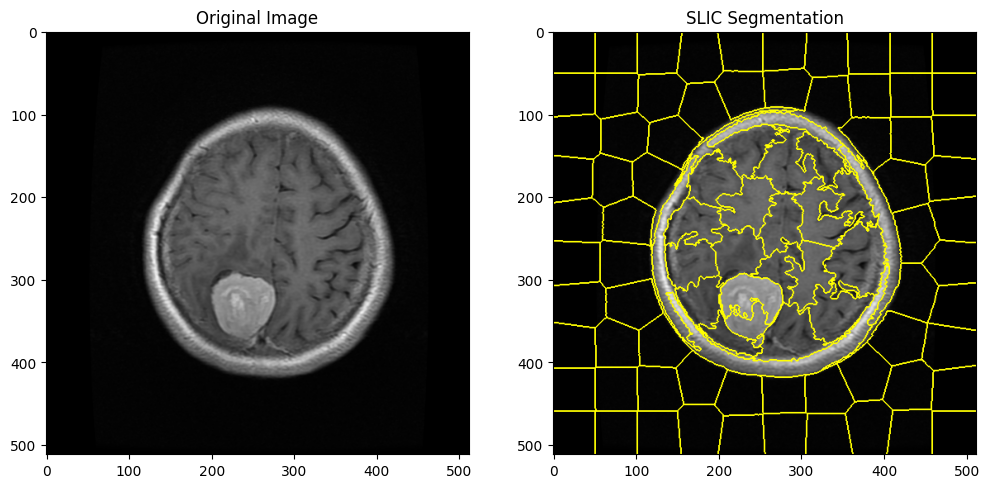

In [4]:
import cv2
import numpy as np
from skimage.segmentation import mark_boundaries
from skimage.segmentation import slic
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('C:/Users/user/Downloads/final year sem 1/VIP/project/brain tumor dataset/images/181.png', cv2.IMREAD_COLOR)

# Convert the image from BGR to RGB (for display with matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Perform SLIC segmentation
segments = slic(img, n_segments=100, compactness=10)

# Create a mask using the segments
mask = np.zeros_like(img)
for seg_val in np.unique(segments):
    mask[segments == seg_val] = np.mean(img[segments == seg_val], axis=(0, 1))

# Display the original image and SLIC segmentation result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(img_rgb)
ax[0].set_title('Original Image')

ax[1].imshow(mark_boundaries(img_rgb, segments))
ax[1].set_title('SLIC Segmentation')

plt.show()


In [ ]:
!pip install scikit-image
!pip install pymaxflow
!pip install opencv-python

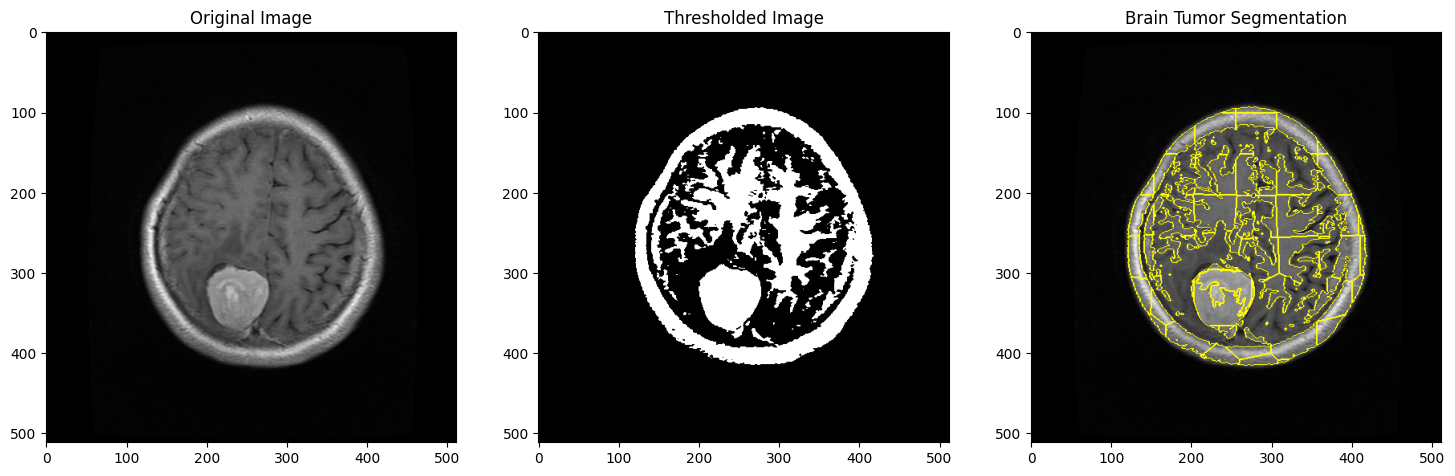

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, segmentation
from pymaxflow import PyMaxflow

# Load your brain tumor image dataset
# Replace 'your_image_path' with the actual path to your image dataset
image = io.imread('your_image_path')

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Generate SLIC superpixels
segments = segmentation.slic(image, n_segments=100, compactness=10, sigma=1)

# Perform Normalized Cut on the superpixels to get the tumor segmentation
def normalized_cut(segmentation, image):
    num_segments = np.max(segmentation) + 1

    g = PyMaxflow.Graph[float](num_segments, np.count_nonzero(segmentation))

    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            p = segmentation[y, x]
            if x < image.shape[1] - 1:
                q = segmentation[y, x + 1]
                diff = np.sum((image[y, x] - image[y, x + 1]) ** 2)
                g.add_edge(p, q, diff, diff)

            if y < image.shape[0] - 1:
                q = segmentation[y + 1, x]
                diff = np.sum((image[y, x] - image[y + 1, x]) ** 2)
                g.add_edge(p, q, diff, diff)

    g.maxflow()

    segmentation_result = np.zeros_like(segmentation)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            segmentation_result[y, x] = g.what_segment(segmentation[y, x])

    return segmentation_result

# Perform Normalized Cut on the SLIC superpixels
result = normalized_cut(segments, gray_image)

# Display the original image, SLIC superpixels, and segmented tumor
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image)
axes[0].set_title('Original Image')

axes[1].imshow(segments, cmap='nipy_spectral')
axes[1].set_title('SLIC Superpixels')

axes[2].imshow(result, cmap='gray')
axes[2].set_title('Segmented Tumor')
plt.show()
